In [1]:
# CONFIGURATION

db = 'semparse_cdr_0'
PARALLELISM = 10
MAX_DOCS = 1500

# LFs
SOURCE = 'nl'
INCLUDE = ['correct', 'passing']

# Generative
MODEL_DEP = False
MAJORITY_VOTE = False
DISPLAY_CORRELATION = True
EMPIRICAL_FROM_TRAIN = True

# Discriminative
SEARCH_N = 20
N_EPOCHS = 50
LR = 0.01
L1_PENALTY = 0.0
L2_PENALTY = 0.0
PRINT_FREQ = 25

In [2]:
import os

os.environ['SNORKELDB'] = 'postgres://localhost:5432/' + db

from snorkel import SnorkelSession
session = SnorkelSession()

In [3]:
from snorkel.semantic import CDRModel
from snorkel.models import candidate_subclass

ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

sm = CDRModel(session,\
              candidate_class=ChemicalDisease,\
              splits=2,\
              parallelism=PARALLELISM)

In [ ]:
%time sm.parse(max_docs=MAX_DOCS)

In [ ]:
%time sm.extract()

In [ ]:
%time sm.load_gold()

In [ ]:
%time sm.featurize()

In [10]:
%time sm.generate_lfs(source=SOURCE, include=INCLUDE)

Created grammar with 297 rules
Discarding 14 failing LFs...
CPU times: user 25 s, sys: 769 ms, total: 25.8 s
Wall time: 27.4 s


In [5]:
%time sm.label()

Clearing existing...
Running UDF...

Labeled split 0: (8272,48) sparse (nnz = 38171)
LF Summary Statistics: 48 LFs applied to 8272 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		95.42%
Overlap (candidates w/ > 1 labels):		81.58%
Conflict (candidates w/ conflicting labels):	61.93%
Redundancy (labels per candidate (avg)):	4.6
Clearing existing...
Running UDF...

Labeled split 1: (888,48) sparse (nnz = 3930)
LF Summary Statistics: 48 LFs applied to 888 candidates
------------------------------------------------------------
Coverage (candidates w/ > 0 labels):		93.36%
Overlap (candidates w/ > 1 labels):		81.53%
Conflict (candidates w/ conflicting labels):	61.71%
Redundancy (labels per candidate (avg)):	4.4
CPU times: user 34.6 s, sys: 5.83 s, total: 40.4 s
Wall time: 2min 41s


Saved 888 training marginals


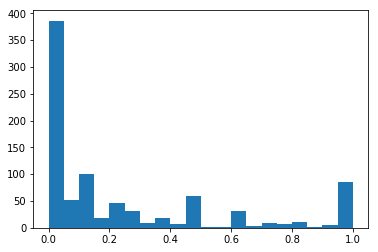

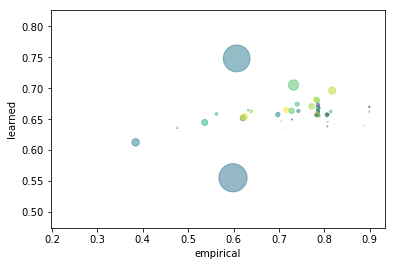

CPU times: user 8.49 s, sys: 85.6 ms, total: 8.57 s
Wall time: 8.94 s


In [6]:
%time sm.generative(model_dep=MODEL_DEP, majority_vote=MAJORITY_VOTE,\
                    display_correlation=DISPLAY_CORRELATION,\
                    empirical_from_train=EMPIRICAL_FROM_TRAIN)

In [7]:
# sm.display_accuracy_correlation()

In [8]:
sm.LF_stats
# for v in sm.LF_stats['Empirical Acc.'].get_values():
#     print v

,j,Coverage,Overlaps,Conflicts,TP,FP,FN,TN,Empirical Acc.,Learned Acc.
LF_c_cause_d_*,0,0.127780,0.125121,0.113878,567,490,0,0,0.536424,0.644699
LF_c_d_*,1,0.099130,0.096470,0.081601,572,248,0,0,0.697561,0.657400
LF_c_induced_d_*,2,0.075073,0.075073,0.063104,488,133,0,0,0.785829,0.655110
LF_c_treat_d_*,3,0.060324,0.060324,0.030222,0,0,95,404,0.809619,0.657988
LF_c_treat_d_wide_*,4,0.091030,0.090546,0.050169,0,0,140,613,0.814077,0.662307
LF_closer_chem,5,0.193303,0.185324,0.135759,0,0,292,1307,0.817386,0.696332
LF_closer_dis,6,0.018133,0.017529,0.014869,0,0,29,121,0.806667,0.638162
LF_ctd_marker_c_d_*,7,0.091634,0.091634,0.078337,561,197,0,0,0.740106,0.674379
LF_ctd_marker_induce_*,8,0.114845,0.114845,0.100701,745,205,0,0,0.784211,0.680129
LF_ctd_marker_induce_0,9,0.075073,0.075073,0.063104,488,133,0,0,0.785829,0.668723


In [ ]:
%time sm.discriminative(model='logreg', search_n=SEARCH_N, n_epochs=N_EPOCHS,\
                        lr=LR, l1_penalty=L1_PENALTY, l2_penalty=L2_PENALTY,\
                        print_freq=PRINT_FREQ)